# Import packages and initial setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Patch
import seaborn as sns
import random as rnd
import PyQt5

In [11]:
%matplotlib inline
sns.set_style('white')

# Import data

In [12]:
full_nfl_data = pd.read_csv('./train.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
full_nfl_data.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


# Pull out relevant columns

In [14]:
full_nfl_data.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [15]:
nfl = full_nfl_data[['GameId', 'PlayId', 'X', 'Y', 'S','Dir','YardLine','FieldPosition','PlayDirection','PossessionTeam','Down', 'Distance', 'Yards',
       'Quarter', 'GameClock', 'Position', 'HomeTeamAbbr','VisitorTeamAbbr','HomeScoreBeforePlay',
       'VisitorScoreBeforePlay',
        ]]

In [16]:
nfl.head()

,GameId,PlayId,X,Y,S,Dir,YardLine,FieldPosition,PlayDirection,PossessionTeam,Down,Distance,Yards,Quarter,GameClock,Position,HomeTeamAbbr,VisitorTeamAbbr,HomeScoreBeforePlay,VisitorScoreBeforePlay
0,2017090700,20170907000118,73.91,34.84,1.69,177.18,35,NE,left,NE,3,2,8,1,14:14:00,SS,NE,KC,0,0
1,2017090700,20170907000118,74.67,32.64,0.42,198.70,35,NE,left,NE,3,2,8,1,14:14:00,DE,NE,KC,0,0
2,2017090700,20170907000118,74.00,33.20,1.22,202.73,35,NE,left,NE,3,2,8,1,14:14:00,DE,NE,KC,0,0
3,2017090700,20170907000118,71.46,27.70,0.42,105.64,35,NE,left,NE,3,2,8,1,14:14:00,ILB,NE,KC,0,0
4,2017090700,20170907000118,69.32,35.42,1.82,164.31,35,NE,left,NE,3,2,8,1,14:14:00,FS,NE,KC,0,0


# Function to convert Yardline
Converts 'YardLine' to 0-100 scale with 0 at Home endzone and 100 at away endzone

In [19]:
def con_yardline(row):
    if (row['FieldPosition'] == row['PossessionTeam'] and row['PlayDirection'] == 'right'):
        return (row['YardLine'])
    elif (row['FieldPosition'] == row['PossessionTeam'] and row['PlayDirection'] == 'left'):
        return (100-row['YardLine'])
    elif (row['FieldPosition'] != row['PossessionTeam'] and row['PlayDirection'] == 'right'):
        return (100-row['YardLine'])
    elif (row['FieldPosition'] != row['PossessionTeam'] and row['PlayDirection'] == 'left'):
        return (row['YardLine'])

### Convert Yardlines and reorder

In [ ]:
nfl['Scrimmage'] = nfl.apply(con_yardline,axis=1).to_list()

In [18]:
nfl = nfl[['GameId', 'PlayId', 'X', 'Y', 'S', 'Dir', 'YardLine','Scrimmage','FieldPosition','PlayDirection','PossessionTeam','Down', 'Distance', 'Yards',
       'Quarter', 'GameClock', 'Position', 'HomeTeamAbbr','VisitorTeamAbbr','HomeScoreBeforePlay',
       'VisitorScoreBeforePlay',
        ]]

# Function to plot field

In [3]:
def make_field():
    plt.figure(figsize=(19.2,8))
    plt.gca().set_facecolor('#49901C')
    plt.vlines([0,10,110,120],0,53.3)
    plt.vlines(np.arange(20,110,10),0,53.3,lw=0.5)
    plt.hlines([0,53.3],0,120)
    plt.hlines([23.63,29.67],10,110,ls='dotted')
    plt.xticks(np.arange(0,130,10),labels=['Home','0','10','20','30','40','50','60','70','80','90','100','Away'])
    plt.yticks([],[])
    plt.xlim([-0.1,120])
    plt.ylim([-0.1,53.4])
    return 

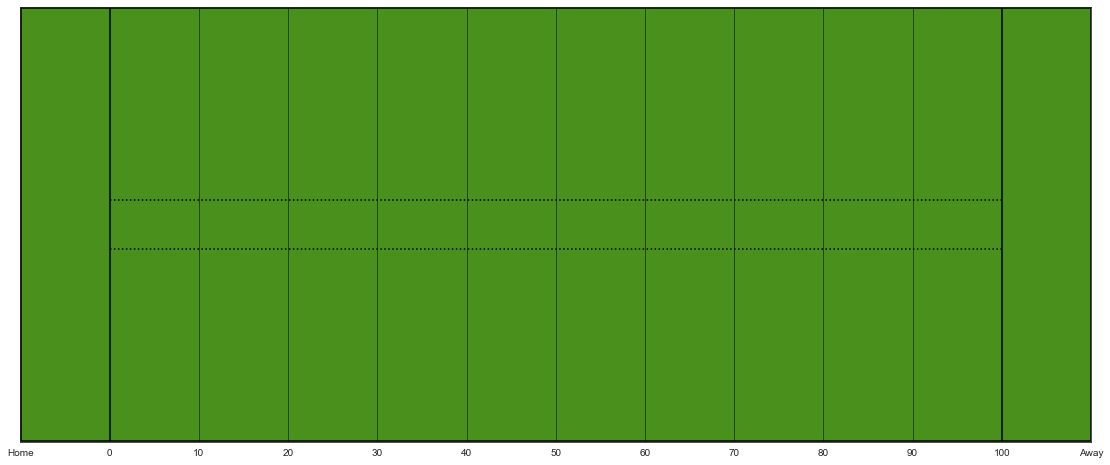

In [9]:
make_field()

# Dictionaries for position color and quarter abbreviation

In [20]:
pos_c = {'SS':'k', 'DE':'k', 'ILB':'k', 'FS':'k', 'CB':'k', 'DT':'k', 'MLB':'k',
         'DL':'k', 'SAF':'k', 'S':'k', 'OLB':'k', 'NT':'k', 'LB':'k', 'DB':'k',
         'WR':'c',
         'TE':'fuchsia',
         'T':'m', 'G':'m', 'C':'m', 'OT':'m', 'OG':'m',
         'QB':'r',
         'RB':'b', 'FB':'b','HB':'b'}

quarters = {1:'1st',2:'2nd',3:'3rd',4:'4th',5:'OT'}

# Plot different views of plays

### Play selection and play info

In [ ]:
#Option for random or specific play

play = nfl.loc[nfl['PlayId'] == 20181230154157]
#play = nfl.loc[nfl['PlayId'] == rnd.choice(nfl['PlayId'])]


#Get play info
play_inf = {'GameID':play.iloc[0]['GameId'],'PlayId':play.iloc[0]['PlayId'],'Home':play.iloc[0]['HomeTeamAbbr'],
            'Visitor':play.iloc[0]['VisitorTeamAbbr'],'Quarter':play.iloc[0]['Quarter'],
            'Down':play.iloc[0]['Down'],'Distance':play.iloc[0]['Distance'],'Scrimmage':play.iloc[0]['Scrimmage'],
            'PossessionTeam':play.iloc[0]['PossessionTeam'],'FieldPosition':play.iloc[0]['FieldPosition'],
            'PlayDirection':play.iloc[0]['PlayDirection'],'GameClock':play.iloc[0]['GameClock'],
            'HomeScoreBeforePlay':play.iloc[0]['HomeScoreBeforePlay'],
            'VisitorScoreBeforePlay':play.iloc[0]['VisitorScoreBeforePlay']}

### Full Field

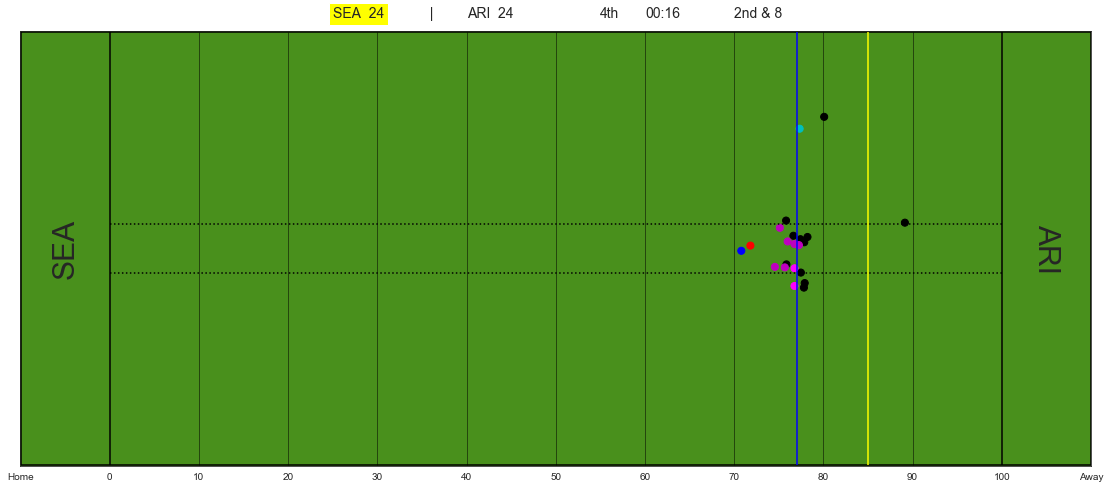

In [24]:
#Make Field
make_field()

#Ticker
HomePossession = (1,1,1)
VisitorPossession = (1,1,1)

if play_inf['PossessionTeam'] == play_inf['Home']:
    HomePossession = (1,1,0)
if play_inf['PossessionTeam'] == play_inf['Visitor']:
    VisitorPossession = (1,1,0)

plt.text(35,55,'{}  {}'.format(play_inf['Home'],play_inf['HomeScoreBeforePlay']),fontsize=14,
         bbox=dict(boxstyle="square",fc=HomePossession))
plt.text(45,55,'  |  ',fontsize=14)
plt.text(50,55,'{}  {}'.format(play_inf['Visitor'],play_inf['VisitorScoreBeforePlay']),fontsize=14,
         bbox=dict(boxstyle="square",fc=VisitorPossession))
plt.text(65,55,quarters[play_inf['Quarter']],fontsize=14)
plt.text(70,55,str(play_inf['GameClock'][:-3]),fontsize=14)
plt.text(80,55,'{} & {}'.format(quarters[play_inf['Down']],play_inf['Distance']), fontsize=14)

plt.text(5,26.65,play_inf['Home'],fontsize=30,rotation=90,horizontalalignment='center',verticalalignment='center')
plt.text(115,26.65,play_inf['Visitor'],fontsize=30,rotation=-90,horizontalalignment='center',verticalalignment='center')


#Players
plt.scatter(play['X'],play['Y'],c=[pos_c[x] for x in play['Position']],s=50)

#Scrimmage
plt.vlines(play_inf['Scrimmage']+10,0,53.3,colors='b')

#First Down
if play_inf['PlayDirection'] == 'right':
    plt.vlines(play_inf['Scrimmage']+10+play_inf['Distance'],0,53.3,colors='yellow')
elif play_inf['PlayDirection'] == 'left':
    plt.vlines(play_inf['Scrimmage']+10-play_inf['Distance'],0,53.3,colors='yellow')

### Vertical Closeup

(16.82, 47.83)

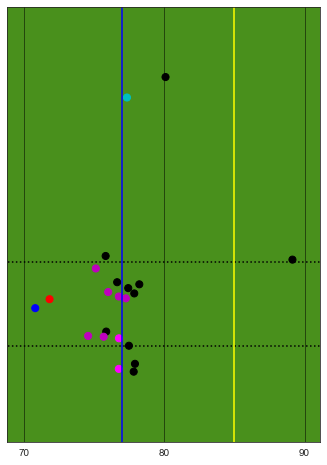

In [25]:
#Make Field
make_field()

#Players
plt.scatter(play['X'],play['Y'],c=[pos_c[x] for x in play['Position']],s=50)

#Scrimmage
plt.vlines(play_inf['Scrimmage']+10,0,53.3,colors='b')

#First Down
if play_inf['PlayDirection'] == 'right':
    plt.vlines(play_inf['Scrimmage']+10+play_inf['Distance'],0,53.3,colors='yellow')
elif play_inf['PlayDirection'] == 'left':
    plt.vlines(play_inf['Scrimmage']+10-play_inf['Distance'],0,53.3,colors='yellow')

#Cut in to closeup
plt.gca().set_aspect(1)
plt.xlim(min(play['X']-2,),max(play['X']+2))
plt.ylim(min(play['Y']-5,),max(play['Y']+5))

### Horizontal Closeup w/movement

(75.8, 104.14)

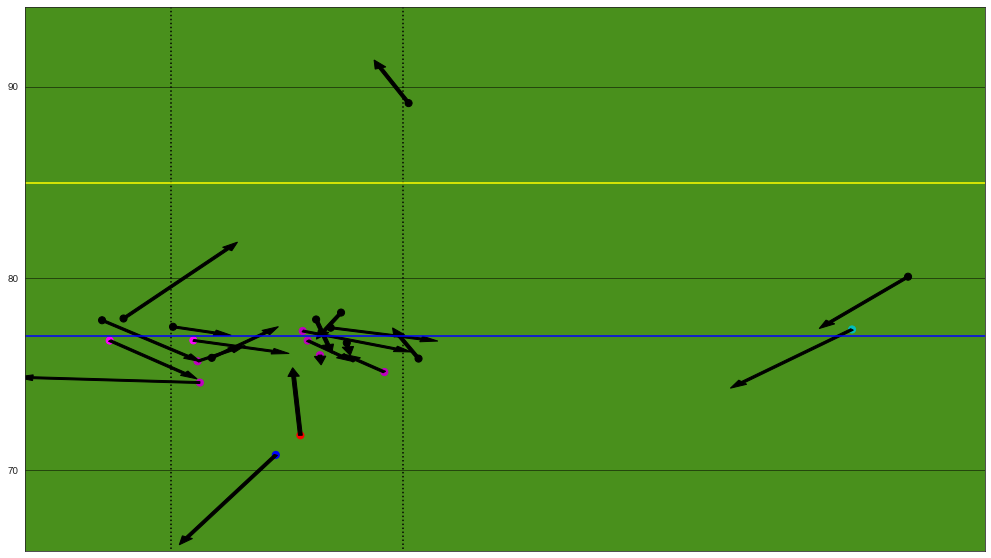

In [26]:
#Make Field
plt.figure(figsize=(20,10))
plt.gca().set_facecolor('#49901C')
plt.hlines([0,10,110,120],0,53.3)
plt.hlines(np.arange(20,110,10),0,53.3,lw=0.5)
plt.vlines([0,53.3],0,120)
plt.vlines([23.63,29.67],10,110,ls='dotted')
plt.yticks(np.arange(0,130,10),labels=['Home','0','10','20','30','40','50','60','70','80','90','100','Away'],)
plt.xticks([],[])

#Players
plt.scatter(play['Y'],play['X'],c=[pos_c[x] for x in play['Position']],s=50)

#Motion
for i,player in play.iterrows():
    plt.arrow(player['Y'],player['X'],
              player['S']*(np.sin(np.radians(player['Dir'])+(np.pi/2))),
              player['S']*(np.cos(np.radians(player['Dir'])+(np.pi/2))),
              width=0.1,ec='k',fc='k')

#Scrimmage
plt.hlines(play_inf['Scrimmage']+10,0,53.3,colors='b')

#First Down
if play_inf['PlayDirection'] == 'right':
    plt.hlines(play_inf['Scrimmage']+10+play_inf['Distance'],0,53.3,colors='yellow')
elif play_inf['PlayDirection'] == 'left':
    plt.hlines(play_inf['Scrimmage']+10-play_inf['Distance'],0,53.3,colors='yellow')

#Cut in to closeup
plt.gca().set_aspect(0.5)
plt.xlim(min(play['Y']-2,),max(play['Y']+2))
plt.ylim(min(play['X']-5,),max(play['X']+5))

### Full field with horizontal closeup

(75.8, 104.14)

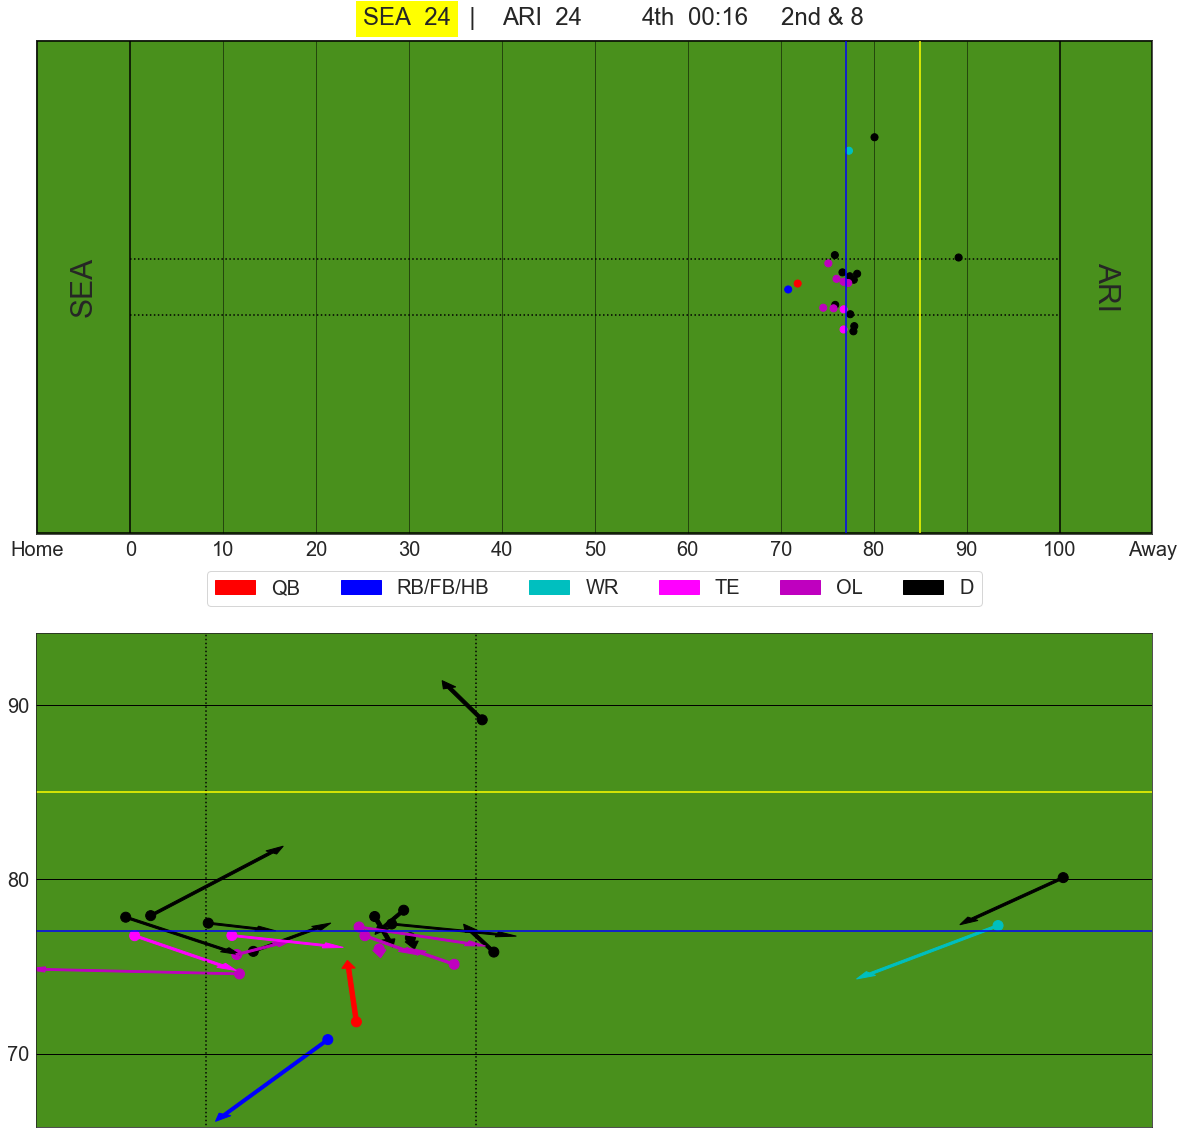

In [27]:
#FULL FIELD

#Make Field
fig,ax = plt.subplots(2,1,figsize=(20,20))
ax[0].set_facecolor('#49901C')
ax[0].vlines([0,10,110,120],0,53.3)
ax[0].vlines(np.arange(20,110,10),0,53.3,lw=0.5)
ax[0].hlines([0,53.3],0,120)
ax[0].hlines([23.63,29.67],10,110,ls='dotted')
ax[0].set_xticks(np.arange(0,130,10))
ax[0].set_yticks([],[])
ax[0].set_xticklabels(['Home','0','10','20','30','40','50','60','70','80','90','100','Away'])
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].set_xlim([-0.1,120])
ax[0].set_ylim([-0.1,53.4])


#Ticker
HomePossession = (1,1,1)
VisitorPossession = (1,1,1)

if play_inf['PossessionTeam'] == play_inf['Home']:
    HomePossession = (1,1,0)
if play_inf['PossessionTeam'] == play_inf['Visitor']:
    VisitorPossession = (1,1,0)

ax[0].text(35,55,'{}  {}'.format(play_inf['Home'],play_inf['HomeScoreBeforePlay']),fontsize=24,
         bbox=dict(boxstyle="square",fc=HomePossession))
ax[0].text(45,55,'  |  ',fontsize=24)
ax[0].text(50,55,'{}  {}'.format(play_inf['Visitor'],play_inf['VisitorScoreBeforePlay']),fontsize=24,
         bbox=dict(boxstyle="square",fc=VisitorPossession))
ax[0].text(65,55,quarters[play_inf['Quarter']],fontsize=24)
ax[0].text(70,55,str(play_inf['GameClock'][:-3]),fontsize=24)
ax[0].text(80,55,'{} & {}'.format(quarters[play_inf['Down']],play_inf['Distance']), fontsize=24)

ax[0].text(5,26.65,play_inf['Home'],fontsize=30,rotation=90,
         horizontalalignment='center',verticalalignment='center')
ax[0].text(115,26.65,play_inf['Visitor'],fontsize=30,rotation=-90,
         horizontalalignment='center',verticalalignment='center')

#Players
ax[0].scatter(play['X'],play['Y'],c=[pos_c[x] for x in play['Position']],s=50)

#Scrimmage
ax[0].vlines(play_inf['Scrimmage']+10,0,53.3,colors='b')

#First Down
if play_inf['PlayDirection'] == 'right':
    ax[0].vlines(play_inf['Scrimmage']+10+play_inf['Distance'],0,53.3,colors='yellow')
elif play_inf['PlayDirection'] == 'left':
    ax[0].vlines(play_inf['Scrimmage']+10-play_inf['Distance'],0,53.3,colors='yellow')

#Position Legend
leg_patch = [Patch(color='r',label='QB'),
             Patch(color='b',label='RB/FB/HB'),
             Patch(color='c',label='WR'),
             Patch(color='fuchsia',label='TE'),
             Patch(color='m',label='OL'),
             Patch(color='k',label='D')]
ax[0].legend(handles=leg_patch,bbox_to_anchor=(0.5,-0.11,0,0),loc='center',ncol=6,prop={'size':20})
    

    
    
#-------------------   
#HORIZONTAL CLOSEUP
#-------------------

#Make Field
ax[1].set_facecolor('#49901C')
ax[1].hlines([0,10,110,120],0,53.3,lw=5)
ax[1].hlines(np.arange(20,110,10),0,53.3,lw=1)
ax[1].vlines([0,53.3],0,120)
ax[1].vlines([23.63,29.67],10,110,ls='dotted')
ax[1].set_yticks(np.arange(0,130,10))
ax[1].set_yticklabels(['Home','0','10','20','30','40','50','60','70','80','90','100','Away'])
ax[1].set_xticks([],[])
ax[1].tick_params(axis='both', which='major', labelsize=20)

#Players
ax[1].scatter(play['Y'],play['X'],c=[pos_c[x] for x in play['Position']],s=100)

#Motion
for i,player in play.iterrows():
    ax[1].arrow(player['Y'],player['X'],
              player['S']*(np.sin(np.radians(player['Dir'])+(np.pi/2))),
              player['S']*(np.cos(np.radians(player['Dir'])+(np.pi/2))),
              width=0.1,ec=pos_c[player['Position']],fc=pos_c[player['Position']])

#Scrimmage
ax[1].hlines(play_inf['Scrimmage']+10,0,53.3,colors='b')

#First Down
if play_inf['PlayDirection'] == 'right':
    ax[1].hlines(play_inf['Scrimmage']+10+play_inf['Distance'],0,53.3,colors='yellow')
elif play_inf['PlayDirection'] == 'left':
    ax[1].hlines(play_inf['Scrimmage']+10-play_inf['Distance'],0,53.3,colors='yellow')

#Cut in to closeup
ax[1].set_xlim(min(play['Y']-2,),max(play['Y']+2))
ax[1].set_ylim(min(play['X']-5,),max(play['X']+5))

#Save file if needed
#fig.savefig('./Plots/SinglePlay.pdf')